In [1]:
# Import required dependencies
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from IPython.display import clear_output
import numpy as np
import time



In [ ]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
    #df.head()

chiefs = df['chief'].unique()
x = 0
for chief in chiefs:
    #print(chief)
    df.loc[df['chief'] == chief, 'chief_term'] = x
    #dfcoyp['chief_term'] = x
    x = x + 1



In [ ]:
trained_model = None
prompts=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcUMWXktcB48qH6B77aGPX1XfrkbBc2_RxzJbmCdtDkUZa2m1orezx1pcrGdvfGytfNQL8L-_58SyP/pub?gid=0&single=true&output=csv")
prompts = prompts.sort_values(by = ['features', 'selection'])
prompts.reset_index(drop=True, inplace=True)


In [32]:
#model_score = []
#model_scores = pd.DataFrame()


def run_model(target):
    #reading csv file from link
    dfwork = df[[
    #"issueArea",
    "decisionDirection",
    "decisionType",
    "threeJudgeFdc",
    "certReason",
    #"lcDisposition",
    "lcDispositionDirection",
    "partyWinning",
    "majVotes",
    #"chief_term",
    "minVotes",
    "caseDisposition"
    ]]
    y=df[[target]]
    X = dfwork.drop(columns=y)
    dfwork= dfwork.sort_index(axis=1)
    columns_to_move = ['majVotes', 'minVotes']
    remaining_columns = [col for col in dfwork.columns if col not in columns_to_move]
    dfwork = dfwork[remaining_columns + columns_to_move]


    #from sklearn.impute import SimpleImputer

    # Impute missing values with the mean
    imputery = SimpleImputer(strategy='constant', fill_value=0)
    #caseDisposition = df[['caseDisposition']]
    y_imputed = imputery.fit_transform(y).reshape(-1)
    #y_imputed = y_imputed.reshape(-1)
    #print(y_imputed)

    #from sklearn.impute import SimpleImputer

    # Impute missing values with the mean
    imputerx = SimpleImputer(strategy='most_frequent')
    X_imputed = pd.DataFrame(imputerx.fit_transform(X), columns=X.columns)
    #print(X_imputed)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, random_state=42)

    return X_train, X_test, y_train, y_test, target

def models(X_train, X_test, y_train, y_test, target):
    knn(X_train, X_test, y_train, y_test, target)
    lr(X_train, X_test, y_train, y_test, target)
    rf(X_train, X_test, y_train, y_test, target)
    dt(X_train, X_test, y_train, y_test, target)
    #return X_train, X_test, y_train, y_test, target
    #return rt_model

#    return X_train, X_test, y_train, y_test, target
    
    # Create the KNN model with 9 neighbors


def knn(X, xt,y, yt, target):
    model = KNeighborsClassifier(n_neighbors=10)
    model_name = 'KNN'
    function_name = 'knn'
    # Fit the model to the training data
    model.fit(X, y)

    #using score function to find training and testing score
    train_score = model.score(X, y)
    test_score = model.score(xt, yt)
    predictions = model.predict(xt)
    acc_score = accuracy_score(yt, predictions)
    #display(f"{model_name} Train/Test Score for {target} column : {train_score:.3f}/{test_score:.3f}")
    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    #return knn_train_score, knn_test_score, target
    return model

def lr(X, xt,y, yt, target):
    # Create the logistic regression classifier model with a random_state of 1
    model = LogisticRegression(max_iter=2000)
    model_name = 'Logistic Regression'
    function_name = 'lr'
    # Fit the model to the training data
    model.fit(X, y)

    train_score = model.score(X, y)
    test_score = model.score(xt, yt)

    # Validate the model by checking the model accuracy with model.score

    #display(f"{model} Train/Test Score for {target} column : {lr_train_score:.3f}/{lr_test_score:.3f}")
    predictions = model.predict(xt)
    # Calculate the accuracy score
    acc_score = accuracy_score(yt, predictions)
    #print(f"Accuracy Score : {acc_score}")

    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    return model

def rf(X, xt,y, yt, target):
    # Create the logistic regression classifier model with a random_state of 1
    model = RandomForestClassifier(n_estimators=128, random_state=42)
    model_name = 'Random Forest'
    function_name = 'rf'
    # Fit the model to the training data
    model.fit(X, y)
    
    train_score = model.score(X, y)
    test_score = model.score(xt, yt)

    # Validate the model by checking the model accuracy with model.score

    #display(f"{model} Train/Test Score for {target} column : {lr_train_score:.3f}/{lr_test_score:.3f}")
    predictions = model.predict(xt)
    # Calculate the accuracy score
    acc_score = accuracy_score(yt, predictions)
    #print(f"Accuracy Score : {acc_score}")
    #trained_model = model
    #print({trained_model})
    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    return model

def dt(X, xt,y, yt, target):
    from sklearn import tree
    # Create the logistic regression classifier model with a random_state of 1
    model = tree.DecisionTreeClassifier()
    model_name = 'Decision Tree'
    function_name = 'dt'
    # Fit the model to the training data
    model.fit(X, y)

    train_score = model.score(X, y)
    test_score = model.score(xt, yt)

    # Validate the model by checking the model accuracy with model.score

    #display(f"{model} Train/Test Score for {target} column : {lr_train_score:.3f}/{lr_test_score:.3f}")
    predictions = model.predict(xt)
    # Calculate the accuracy score
    acc_score = accuracy_score(yt, predictions)
    #print(f"Accuracy Score : {acc_score}")

    update_score(target,model_name, function_name, train_score, test_score, acc_score)
    return model

def update_score(target, model, fn, trs, tss, acc):
    
    model_score.append({'target_column': target, 'model_name': model, 'function_name' : fn, 'training_score': trs, 'testing_score': tss, 'accuracy_score': acc})
    #display(model_scores.head())
    #return model_scores

def prompt():
#    #prompts=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcUMWXktcB48qH6B77aGPX1XfrkbBc2_RxzJbmCdtDkUZa2m1orezx1pcrGdvfGytfNQL8L-_58SyP/pub?gid=0&single=true&output=csv")
#    prompts = prompts.sort_values(by = ['features', 'selection'])
#    prompts.reset_index(drop=True, inplace=True)
#    prompts
    selection_prompts = prompts
    selection1 = np.array([])
    for p in prompts['features'].unique():
        #time.sleep(1)
        display(f"Please select a feature from the list of {p} below:")
        
        for i, feature in enumerate((prompts[prompts['features'] == p]['value']), start=1):
            display(f"{i}... {feature}")
        selection1 = np.append(selection1,int(input("Enter the number corresponding to your choice: "))).astype(int)
        
        clear_output()
        
        #time.sleep(1)

    mv = np.append(selection1,int(input("Enter number of majority votes: "))).astype(int)
    nv = np.append(selection1,int(input("Enter number of minority votes: "))).astype(int)
    #selection_df = pd.DataFrame(selection1)
    #selection_df = selection_df.T
    #selection_df.loc[0]
    #predict(selection1)
    return selection1
    

def predict_outcome(trained_model):
    #    #prompts=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcUMWXktcB48qH6B77aGPX1XfrkbBc2_RxzJbmCdtDkUZa2m1orezx1pcrGdvfGytfNQL8L-_58SyP/pub?gid=0&single=true&output=csv")
#    prompts = prompts.sort_values(by = ['features', 'selection'])
#    prompts.reset_index(drop=True, inplace=True)
#    prompts
    #selection_prompts = prompts
    selection1 = np.array([])
    for p in prompts['features'].unique():
        #time.sleep(1)
        display(f"Please select a feature from the list of {p} below:")
        
        for i, feature in enumerate((prompts[prompts['features'] == p]['value']), start=1):
            display(f"{i}... {feature}")
        selection1 = np.append(selection1,int(input("Enter the number corresponding to your choice: "))).astype(int)
        
        clear_output()
        
        #time.sleep(1)

    mv = np.append(selection1,int(input("Enter number of majority votes: "))).astype(int)
    nv = np.append(selection1,int(input("Enter number of minority votes: "))).astype(int)
    #selection_df = pd.DataFrame(selection1)
    #selection_df = selection_df.T
    #selection_df.loc[0]
    #predict(selection1)
    #return selection1
    selection_df = pd.DataFrame(selection1)
    selection_df = selection_df.T
    selection_df.loc[0]
    #print(selection_df)
    #X_new1 = np.array([X_imputed2.iloc[13853].to_numpy().astype(int)])
    X_new1 = np.array([selection_df.iloc[0].to_numpy().astype(int)])
    #print(X_new1)
    
    # Get prediction
    #print(model)
    #global trained_model
    #prediction = trained_model.predict(X_new1)
    prediction = trained_model.predict(X_new1)
    #print(f"Based on the data, prediction for the {y.columns[0]} is {prediction[0][0].astype(int)}")
    #print(f"Based on the data, prediction for the {y.columns[1]} is {prediction[0][1].astype(int)}")
    #my_prediction = prompts[(prompts['features'] == y_imputed.columns[0]) & (prompts['selection'] == round(prediction[0][0],0))]['value']
    my_prediction = prompts[(prompts['features'] == target) & (prompts['selection'] == round(prediction[0]))]['value'].iloc[0]
    clear_output()
    print(f"I predict that {my_prediction}")
#prediction = model.predict(rt_model, selection1)


In [33]:
targets = ('partyWinning', 'decisionDirection', 'decisionType', 'caseDisposition', 'lcDispositionDirection')
model_score = []
for target in targets:

    X_train, X_test, y_train, y_test, target = run_model(target)
    models(X_train, X_test, y_train, y_test, target)

model_scores = pd.DataFrame(model_score)

model_scores


,target_column,model_name,function_name,training_score,testing_score,accuracy_score
0,partyWinning,KNN,knn,0.961983,0.949192,0.949192
1,partyWinning,Logistic Regression,lr,0.778441,0.771940,0.771940
2,partyWinning,Random Forest,rf,0.985274,0.967090,0.967090
3,partyWinning,Decision Tree,dt,0.985274,0.968533,0.968533
4,decisionDirection,KNN,knn,0.904042,0.890589,0.890589
5,decisionDirection,Logistic Regression,lr,0.634552,0.629330,0.629330
6,decisionDirection,Random Forest,rf,0.941193,0.924365,0.924365
7,decisionDirection,Decision Tree,dt,0.941193,0.914261,0.914261
8,decisionType,KNN,knn,0.843407,0.834873,0.834873
9,decisionType,Logistic Regression,lr,0.830606,0.834007,0.834007


In [ ]:
trained_model = rf(X_train, X_test, y_train, y_test, target)
predict_outcome(trained_model)

In [108]:
dfwork.corr()

,caseDisposition,certReason,chief_term,decisionDirection,decisionType,lcDisposition,partyWinning,threeJudgeFdc,majVotes,minVotes
caseDisposition,1.000000,0.055383,0.098774,-0.026995,0.176855,0.095043,0.296629,0.010898,0.108946,-0.109767
certReason,0.055383,1.000000,0.026959,-0.040393,0.060066,-0.004911,0.098374,-0.396706,-0.033025,0.022940
chief_term,0.098774,0.026959,1.000000,-0.066552,-0.037462,-0.031272,0.053325,-0.074783,0.058441,0.005090
decisionDirection,-0.026995,-0.040393,-0.066552,1.000000,-0.011150,0.020459,0.094781,0.005293,0.107861,-0.121406
decisionType,0.176855,0.060066,-0.037462,-0.011150,1.000000,-0.012978,-0.067473,0.016891,-0.059417,0.048407
lcDisposition,0.095043,-0.004911,-0.031272,0.020459,-0.012978,1.000000,0.056618,0.152791,0.038283,-0.057137
partyWinning,0.296629,0.098374,0.053325,0.094781,-0.067473,0.056618,1.000000,-0.015379,0.094350,-0.093165
threeJudgeFdc,0.010898,-0.396706,-0.074783,0.005293,0.016891,0.152791,-0.015379,1.000000,-0.026838,0.029615
majVotes,0.108946,-0.033025,0.058441,0.107861,-0.059417,0.038283,0.094350,-0.026838,1.000000,-0.931409
minVotes,-0.109767,0.022940,0.005090,-0.121406,0.048407,-0.057137,-0.093165,0.029615,-0.931409,1.000000


In [2]:
#set # if nax rows and columns to show
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

partywinning
is disposition direction
Declaration uncon
case disposition
Vote unclear
isdecisiondirection
issuearea
decisiondirectiondissent
lawsupp
case source

In [47]:
!pip install pydotplus

In [48]:
import pydotplus
from IPython.display import Image

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.23613 to fit



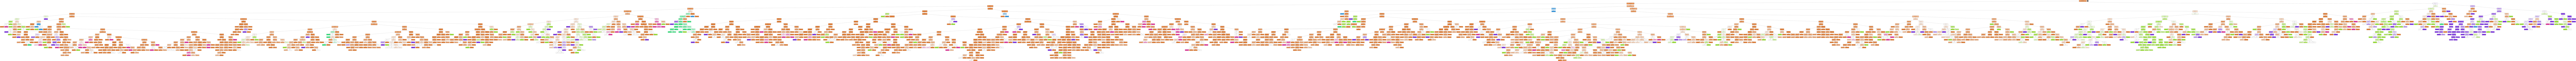

In [49]:
#Create DOT data
dot_data = tree.export_graphviz(
    d_model, out_file=None, feature_names=X_imputed.columns, filled=True, max_depth=30
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [149]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [150]:
mse = mean_squared_error(y_test2, predictions, multioutput='raw_values')
r2 = r2_score(y_test2, predictions, multioutput='raw_values')

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: [0.0365441]
R^2 Score: [0.84693406]


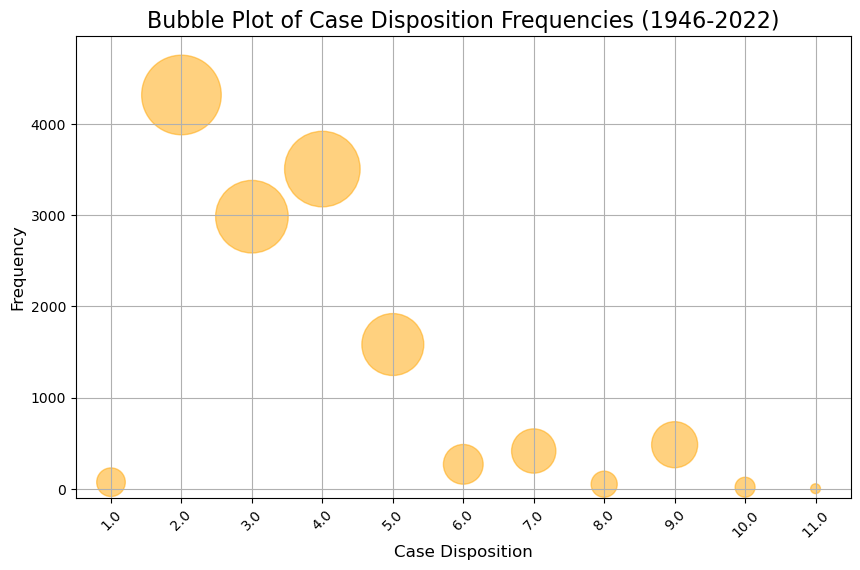

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dfwork has a 'caseDisposition' column

# Calculate the frequency of each caseDisposition
case_disposition_counts = dfwork['caseDisposition'].value_counts()

# Get the unique caseDisposition values and their frequencies
case_disposition_values = case_disposition_counts.index
frequencies = case_disposition_counts.values

# Normalize bubble sizes for better visualization
bubble_sizes = np.sqrt(frequencies) * 50  # Adjust the scaling factor (50) as needed

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    case_disposition_values,  # x-axis (caseDisposition)
    frequencies,  # y-axis (frequency of caseDisposition)
    s=bubble_sizes,  # Bubble size (proportional to frequency)
    color='orange', alpha=0.5
)

# Set the title and labels
plt.title('Bubble Plot of Case Disposition Frequencies (1946-2022)', fontsize=16)
plt.xlabel('Case Disposition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

x_ticks = case_disposition_values  # Use caseDisposition values as tick positions
plt.xticks(ticks=x_ticks, labels=x_ticks, rotation=45)  # Rotate labels if needed for readability

plt.ylim(-100, max(frequencies) * 1.15)  # Set y-limit slightly above the max frequency for better visibility


# Show the plot
plt.grid(True)
plt.show()